# Linear Discriminant Analysis (LDA):

**Linear Discriminant Analysis (LDA)**, also known as Normal Discriminant Analysis or Discriminant Function Analysis, is a dimensionality reduction technique primarily utilized in supervised classification problems.

- It facilitates the modeling of distinctions between groups, effectively separating two or more classes.
- LDA operates by projecting features from a higher-dimensional space into a lower-dimensional one.

In machine learning, LDA serves as a supervised learning algorithm specifically designed for classification tasks, aiming to identify a linear combination of features that optimally segregates classes within a dataset.

### Purpose:

Develop a model that classifies marital status based on features in the biochemist dataset.

### Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report
from sklearn import metrics

initiated datasets repo at: C:\Users\SAAD\.pydataset/


In [3]:
df = data('bioChemists')
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


### Dummy Variables:

There are two variables that contain text so we need to convert these two dummy varirables for our analysis.

In [4]:
dummy = pd.get_dummies(df['fem'])
df = pd.concat([df,dummy], axis=1)
dummy = pd.get_dummies(df['mar'])
df = pd.concat([df,dummy], axis=1)
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,1,0,1,0
2,0,Women,Single,0,2.05,6,0,1,0,1
3,0,Women,Single,0,3.75,6,0,1,0,1
4,0,Men,Married,1,1.18,3,1,0,1,0
5,0,Women,Single,0,3.75,26,0,1,0,1


Here's what we did,

- We created the dummy variable by using .get_dummies() function.
- We saved the output in an object called dummy.
- We then combine the dummy and df dataset with .concat() function. We repeat this process for second variable.

In [5]:
X = df[['Men', 'kid5', 'phd', 'ment', 'art']]
y = df['Married']

### Train and Test Sets:

The **X** dataset has our five independent variables and the **y** dataset has our dependent variable which is married or not.

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The data 70% for training and 30% for testing. We can now proceed to model development and testing.

### Model Training & Testing:

In [7]:
clf = LDA()
clf.fit(X_train,y_train)
print("Accuracy Score is:")
clf.score(X_train,y_train)

Accuracy Score is:


0.728125

In [8]:
y_pred = clf.predict(X_test)

In [9]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

### Evaluation:

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        89
           1       0.79      0.78      0.78       186

    accuracy                           0.71       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.71      0.71      0.71       275



Overall accuracy is 71% which is not too bad.

### Visualization:

<Figure size 432x288 with 0 Axes>

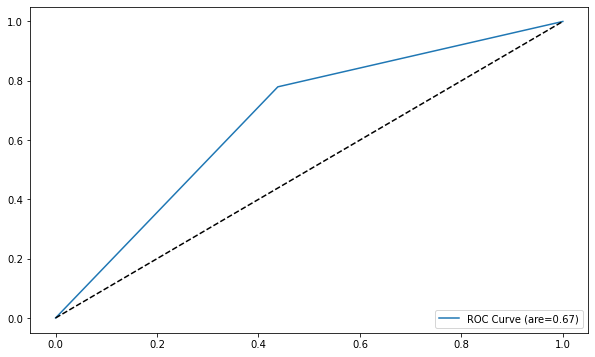

In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc="lower right")

- This dotted black line is like worst case. It's a straight line it means that your model is not doing a very good job at beyond guessing.
- You see the curve, the more it curves up into the upper left hand corner the better your model is at discriminating or classifying the model.